In [1]:
import h5py as h5

readfile = "./from_cloud/b_radAmplitudes_68500_0_0_0.h5"
f = h5.File(readfile, 'r')

In [2]:
def h5_tree(val, pre=''):
    items = len(val)
    for key, val in val.items():
        items -= 1
        if items == 0:
            # the last item
            if type(val) == h5._hl.group.Group:
                print(pre + '└── ' + key)
                h5_tree(val, pre+'    ')
            else:
                print(pre + '└── ' + key + ' (%d)' % len(val))
        else:
            if type(val) == h5._hl.group.Group:
                print(pre + '├── ' + key)
                h5_tree(val, pre+'│   ')
            else:
                print(pre + '├── ' + key + ' (%d)' % len(val))

In [3]:
h5_tree(f)
list(f.keys())

└── data
    └── 68500
        └── DetectorMesh
            ├── Amplitude
            │   ├── x_Im (440)
            │   ├── x_Re (440)
            │   ├── y_Im (440)
            │   ├── y_Re (440)
            │   ├── z_Im (440)
            │   └── z_Re (440)
            ├── DetectorDirection
            │   ├── x (440)
            │   ├── y (440)
            │   └── z (440)
            └── DetectorFrequency
                └── omega (1)


['data']

In [4]:
dataAmpl_x_Im = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('x_Im')[:]
dataAmpl_x_Re = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('x_Re')[:]
dataAmpl_y_Im = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('y_Im')[:]
dataAmpl_y_Re = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('y_Re')[:]
dataAmpl_z_Im = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('z_Im')[:]
dataAmpl_z_Re = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('z_Re')[:]

dataDetector_x = f.get('data').get('68500').get('DetectorMesh').get('DetectorDirection').get('x')[:]
dataDetector_y = f.get('data').get('68500').get('DetectorMesh').get('DetectorDirection').get('y')[:]
dataDetector_z = f.get('data').get('68500').get('DetectorMesh').get('DetectorDirection').get('z')[:]

dataFreq = f.get('data').get('68500').get('DetectorMesh').get('DetectorFrequency').get('omega')[:]

In [55]:
arr = np.stack((dataAmpl_x_Im, dataAmpl_x_Re, dataAmpl_y_Im, dataAmpl_y_Re), axis=2)
print(arr.shape)

(440, 2048, 4, 1)


In [53]:
print(dataAmpl_x_Im.shape)
print(dataDetector_x.shape)
print(dataFreq.shape)

(440, 2048, 1)
(440, 1, 1)
(1, 2048, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

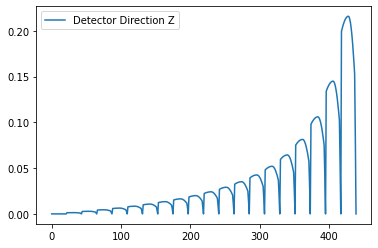

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,440,1), dataDetector_x[:,0,0], label="Detector Direction X")
plt.plot(np.arange(0,440,1), dataDetector_y[:,0,0], label="Detector Direction Y")
plt.plot(np.arange(0,440,1), dataDetector_z[:,0,0], label="Detector Direction Z")

plt.legend()
plt.show

/trinity/shared/pkg/devel/python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


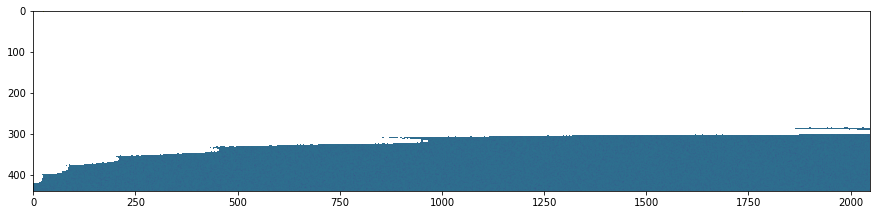

In [50]:
fig = plt.figure(figsize=(15,7))
plt.imshow(np.log(dataAmpl_z_Re[:,:,0]+np.random.rand(440, 2048)*0.001))
#plt.plot(np.log(dataAmpl_x_Im[0,:,0]+np.random.rand(2048)*0.001))
plt.show()

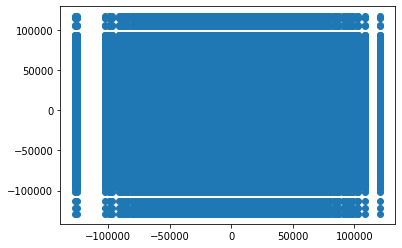

In [52]:
xy = np.meshgrid(dataAmpl_x_Re[10,:,0], dataAmpl_x_Im[10,:,0])
plt.scatter(*xy)
plt.show()